In [59]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

In [60]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = keras.utils.get_file(os.path.basename(train_dataset_url),
                                        origin=train_dataset_url,)
print("Local copy of the dataset : {}".format(train_dataset_fp))

Local copy of the dataset : /home/tornike/.keras/datasets/iris_training.csv


In [61]:
!head {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
5.7,3.8,1.7,0.3,0
4.4,3.2,1.3,0.2,0
5.4,3.4,1.5,0.4,0
6.9,3.1,5.1,2.3,2
6.7,3.1,4.4,1.4,1


In [62]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [63]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1,
)

In [64]:
print(next(iter(train_dataset)))

(OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.2, 6.2, 5.2, 5.8, 4.6, 6.7, 6.8, 6.8, 4.4, 6.3, 5.8, 5.8, 4.8,
       7.6, 7.7, 6.4, 6.9, 5.7, 6.5, 6.4, 6.4, 5.2, 5.8, 5.1, 6.6, 5.9,
       5.1, 6. , 4.4, 6.3, 6.3, 5. ], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.8, 2.2, 3.4, 4. , 3.4, 3.1, 3. , 3.2, 3.2, 2.7, 2.8, 2.6, 3.1,
       3. , 3. , 2.7, 3.2, 4.4, 2.8, 3.2, 2.8, 2.7, 2.7, 3.5, 2.9, 3.2,
       3.8, 2.2, 2.9, 2.3, 3.4, 3.4], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.8, 4.5, 1.4, 1.2, 1.4, 4.4, 5.5, 5.9, 1.3, 4.9, 5.1, 4. , 1.6,
       6.6, 6.1, 5.3, 5.7, 1.5, 4.6, 5.3, 5.6, 3.9, 4.1, 1.4, 4.6, 4.8,
       1.5, 5. , 1.4, 4.4, 5.6, 1.5], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.8, 1.5, 0.2, 0.2, 0.3, 1.4, 2.1, 2.3, 0.2, 1.8, 2.4, 1.2, 0.2,
       2.1, 2.3, 1.9, 2.3, 0.4, 1.5, 2.3, 2.2, 1.4, 1. , 0.3

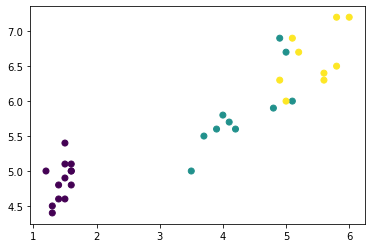

In [65]:
features, labels = next(iter(train_dataset))
plt.scatter(features['petal_length'], 
            features['sepal_length'],
            c=labels,
           )

In [66]:
def pack_features_vector(features, labels):
    return tf.stack(list(features.values()), axis=1), labels

In [67]:
train_dataset = train_dataset.map(pack_features_vector)

In [68]:
features, labels = next(iter(train_dataset))

In [69]:
model = keras.models.Sequential([
    keras.layers.Input((4,)),
    keras.layers.Dense(10, activation=tf.nn.relu,),
    keras.layers.Dense(10, activation=tf.nn.relu,),
    keras.layers.Dense(3),
])

In [70]:
loss_object = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
def loss(model, x, y, training):
    y_ = model(x)
    return loss_object(y_true=y, y_pred=y_,)

print("Loss test: {}".format(loss(model, features, labels, training=False)))

Loss test: 1.4609739780426025


In [71]:
predictions = model(features)
print("Predictions: {}".format(predictions))

Predictions: [[-2.4846818  -2.4530618  -1.4335564 ]
 [-2.2249892  -2.1636136  -1.1418291 ]
 [-2.4821095  -2.461014   -1.250261  ]
 [-2.0474195  -1.5561192  -0.37923384]
 [-2.1507819  -1.705739   -0.33107018]
 [-1.8782734  -1.4828308  -0.3253907 ]
 [-2.101097   -2.0428126  -1.0905362 ]
 [-2.2386947  -2.439799   -1.3575237 ]
 [-2.6057634  -2.5790582  -1.4751062 ]
 [-2.3214233  -1.8770585  -0.4052596 ]
 [-1.8967259  -2.0022213  -1.1261171 ]
 [-2.911715   -2.8311458  -1.6893843 ]
 [-1.9604965  -1.5724189  -0.34368634]
 [-2.2002916  -1.6947192  -0.3495673 ]
 [-2.2637672  -2.3720222  -1.3593955 ]
 [-2.0122263  -2.0643632  -1.0683272 ]
 [-2.0232265  -1.5675976  -0.37634027]
 [-2.6334643  -2.6869683  -1.5374068 ]
 [-2.907987   -3.1550264  -1.768555  ]
 [-2.5368752  -1.8493034  -0.29704058]
 [-2.3218663  -1.7346774  -0.40656435]
 [-2.5147445  -2.4655545  -1.3161744 ]
 [-2.2404585  -2.285965   -1.3123645 ]
 [-2.0458348  -2.2132492  -1.2193971 ]
 [-2.292077   -2.3724425  -1.3903294 ]
 [-2.2190154

In [72]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, training=True)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)



In [73]:
optimizer = tf.keras.optimizers.SGD(lr=1e-2)

In [74]:
loss_value, grads = grad(model, features, labels)

print("Step {}, Initial Loss {}"
      .format(optimizer.iterations.numpy(),
              loss_value.numpy()
             ))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

Step 0, Initial Loss 1.4609739780426025


<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [75]:
print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 1,         Loss: 1.3419630527496338


In [84]:
train_loss_results = []
train_accuracy_results = []

epochs = 201

model = keras.models.clone_model(model)
accuracy_metric = keras.metrics.Accuracy()

for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    
    for step,(x,y) in enumerate(train_dataset):
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        epoch_loss_avg.update_state(loss_value)
        epoch_accuracy.update_state(y, model(x, training=True))
        
        
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if(epoch % 50 == 0):
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.049, Accuracy: 40.833%
Epoch 050: Loss: 0.360, Accuracy: 91.667%
Epoch 100: Loss: 0.222, Accuracy: 97.500%
Epoch 150: Loss: 0.153, Accuracy: 97.500%
Epoch 200: Loss: 0.124, Accuracy: 97.500%


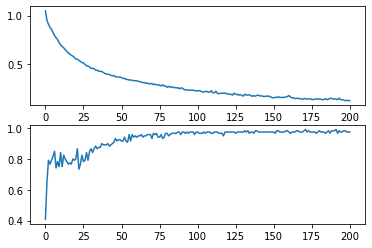

In [89]:
fig, axes = plt.subplots(2,1)

axes[0].plot(train_loss_results)
axes[1].plot(train_accuracy_results)
